In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/data/IMDb_Dataset_2.csv')


In [ ]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


**Dataset contains the following columns**



1.   Title -              The name of the movie
2.   IMDB Rating -        IMDB rating of the movie
3.   Year -               Year in which movie was released
4.   Certificates -     The certification of the movie (e.g., R, PG-13).
5.   Genre -              The genre(s) of the movie
6.   Director -           Director(s) of the movie
7.   Star Cast -          The main Actors in the movie
8.   MetaScore -          The Metacritic score of the movie
9.   Duration (minutes) - Duration of the movie in minutes







# Data Preprocessing

**Asking basic questions**

In [ ]:
df.isnull().sum()

,0
Title,0
IMDb Rating,0
Year,0
Certificates,0
Genre,0
Director,0
Star Cast,0
MetaScore,0
Poster-src,0
Duration (minutes),0


*Since there is not a single null value we can proceed without any imputation technique*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [ ]:
df.duplicated().sum()

411

*since there are 411 duplicate movies in our dataset removing them is crucial*

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()


,IMDb Rating,Year,MetaScore,Duration (minutes)
count,2762.000000,2762.000000,2762.000000,2762.000000
mean,6.898371,2004.443881,65.755612,115.241781
std,0.809457,16.955123,10.863215,21.184385
min,3.900000,1917.000000,20.000000,46.000000
25%,6.400000,1997.000000,65.000000,105.000000
50%,6.900000,2010.000000,66.000000,116.300000
75%,7.400000,2016.000000,67.000000,120.000000
max,9.500000,2025.000000,100.000000,317.000000


In [ ]:
df.describe(include='object')

,Title,Certificates,Genre,Director,Star Cast,Poster-src
count,2762,2762,2762,2762,2762,2762
unique,2739,16,17,2089,2592,2623
top,Aladdin,R,Biography,Ridley Scott,Daniel RadcliffeEmma WatsonRupert Grint,https://m.media-amazon.com/images/M/MV5BOTMyMj...
freq,2,1618,679,19,140,140


# **Analyzing Relationships**
We'll analyze the relationships between IMDb ratings and the following features:

* Year
* Certificates
* Genre
* Director
* MetaScore
* Duration (minutes)

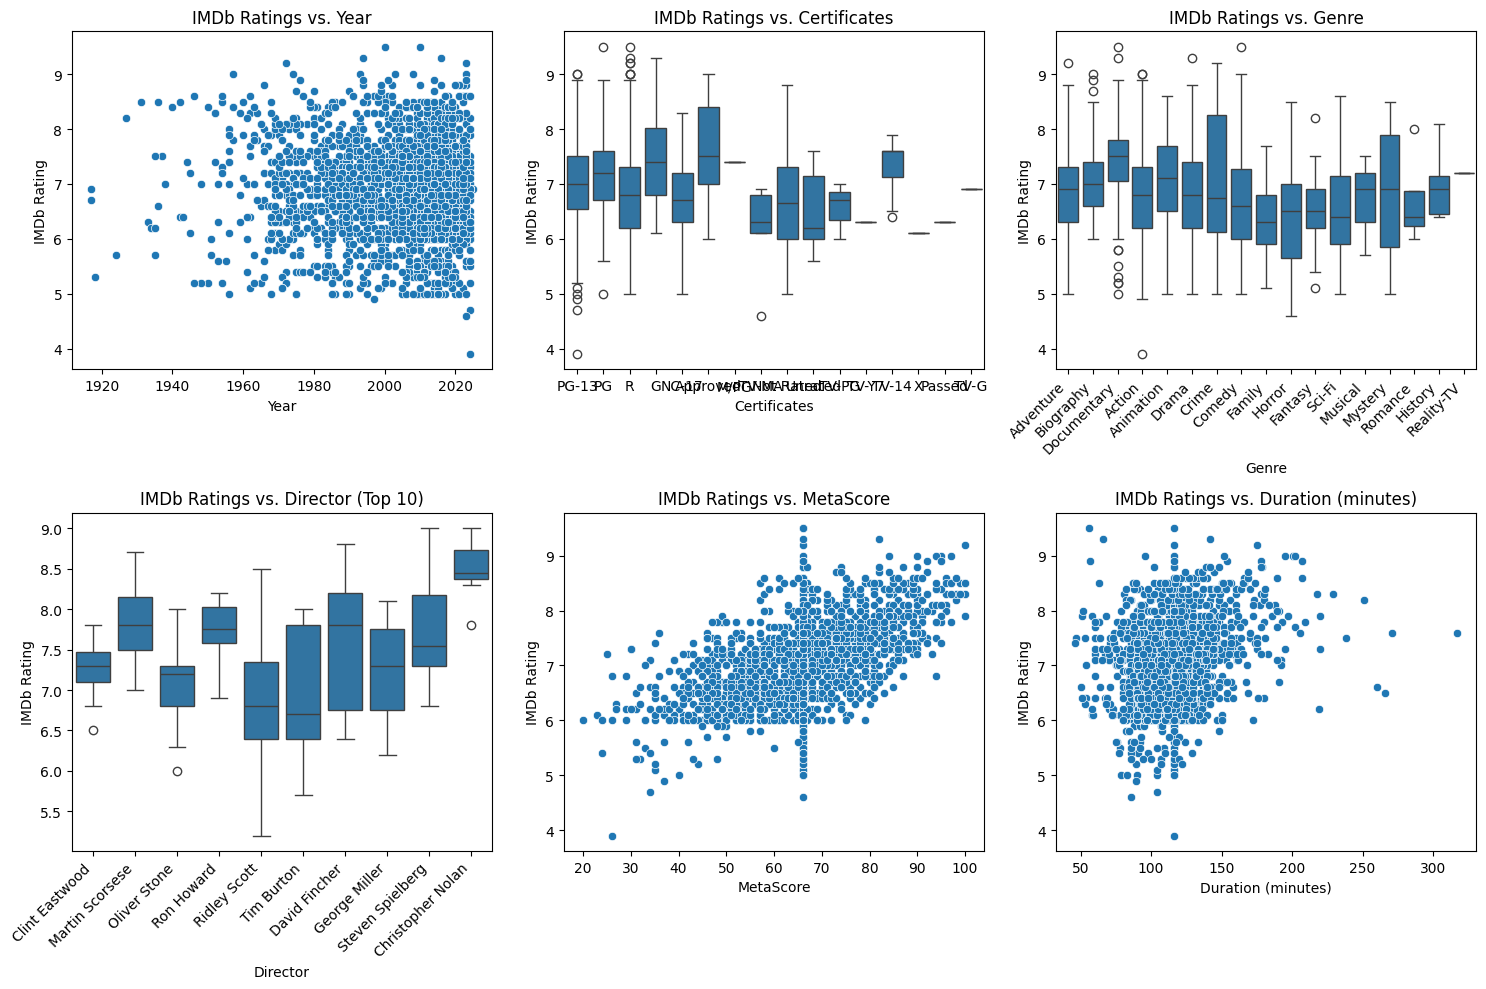

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# IMDb Ratings vs. Year
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Year', y='IMDb Rating')
plt.title('IMDb Ratings vs. Year')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Certificates
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Certificates', y='IMDb Rating')
plt.title('IMDb Ratings vs. Certificates')
plt.xlabel('Certificates')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Genre
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Genre', y='IMDb Rating')
plt.title('IMDb Ratings vs. Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')

# IMDb Ratings vs. Director (Top 10 Directors by count)
top_directors = df['Director'].value_counts().index[:10]
plt.subplot(2, 3, 4)
sns.boxplot(data=df[df['Director'].isin(top_directors)], x='Director', y='IMDb Rating')
plt.title('IMDb Ratings vs. Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')

# IMDb Ratings vs. MetaScore
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='MetaScore', y='IMDb Rating')
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Duration (minutes)
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='Duration (minutes)', y='IMDb Rating')
plt.title('IMDb Ratings vs. Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')

plt.tight_layout()
plt.show()

Analysis of plots

IMDb Ratings vs. Year:
The scatter plot shows the distribution of IMDb ratings over different years. There's no clear trend, suggesting that movie ratings haven't significantly changed over time.

IMDb Ratings vs. Certificates:
The box plot illustrates the IMDb ratings across different certification categories. Movies with an "R" rating show a wider range of ratings compared to other certifications.

IMDb Ratings vs. Genre:
The box plot displays the IMDb ratings for different genres. Genres like Adventure and Drama have a wider range of ratings, whereas genres like Action tend to have ratings that are more closely clustered.

IMDb Ratings vs. Director (Top 10 Directors):
The box plot compares the IMDb ratings for movies directed by the top 10 directors by movie count. Directors like Quentin Tarantino and Ridley Scott generally have higher ratings for their movies.

IMDb Ratings vs. MetaScore:
The scatter plot examines the relationship between IMDb ratings and Metascores. There is a positive correlation, indicating that movies with higher Metascores also tend to have higher IMDb ratings.

IMDb Ratings vs. Duration (minutes):
The scatter plot explores the relationship between IMDb ratings and movie duration. There is no clear trend, suggesting that the length of a movie doesn't significantly impact its IMDb rating.

# Exploratory Data Analysis (EDA).

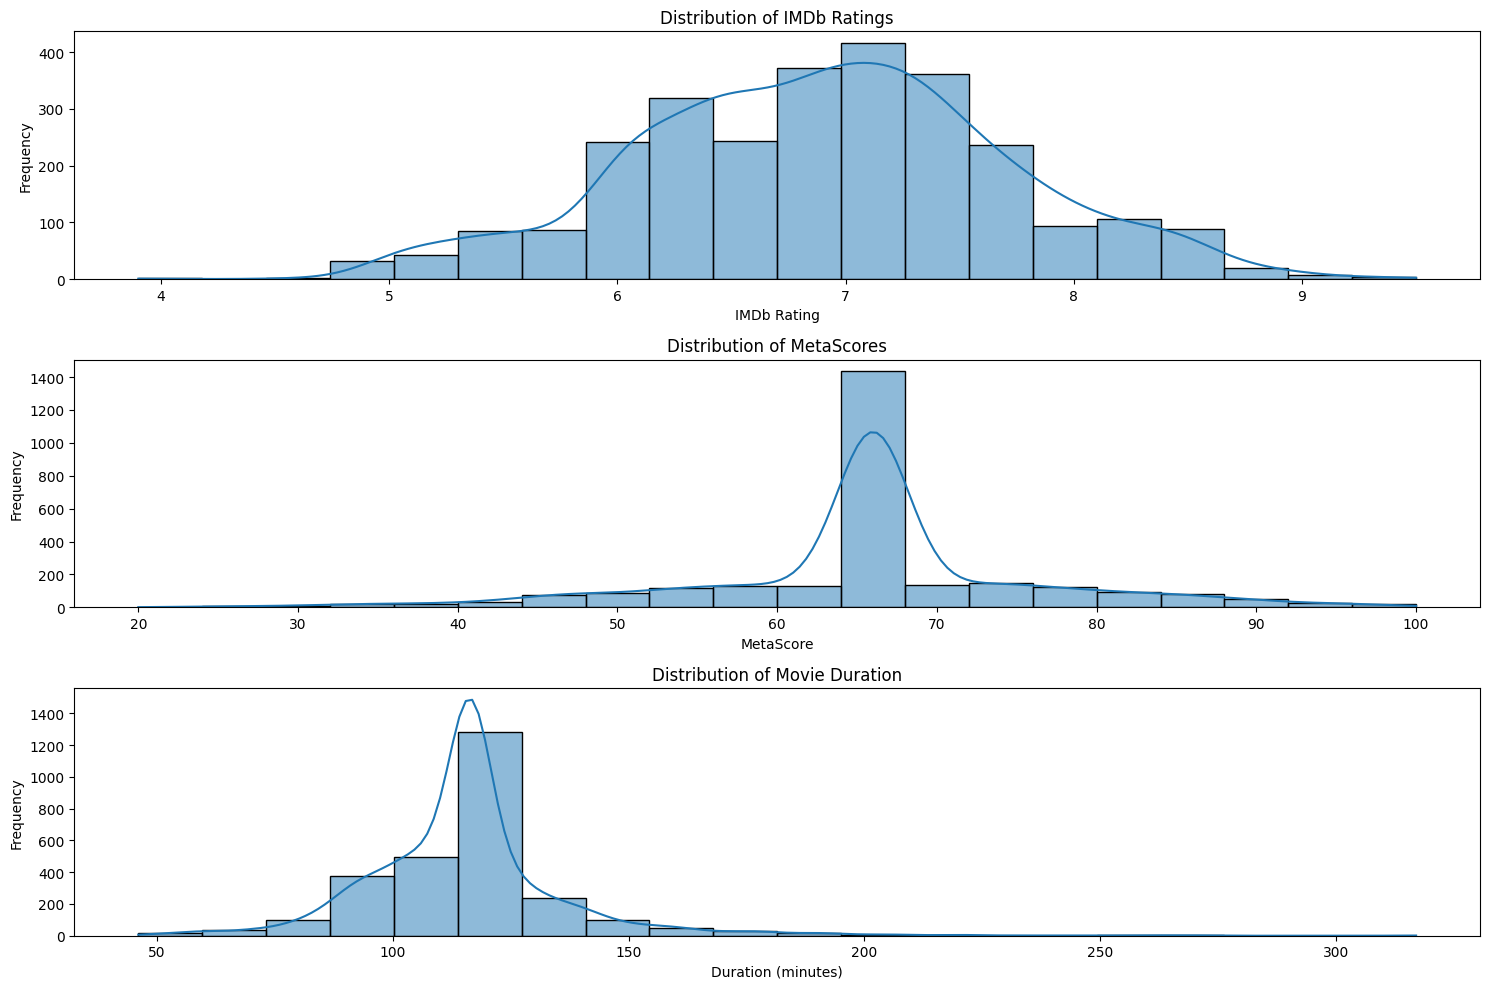

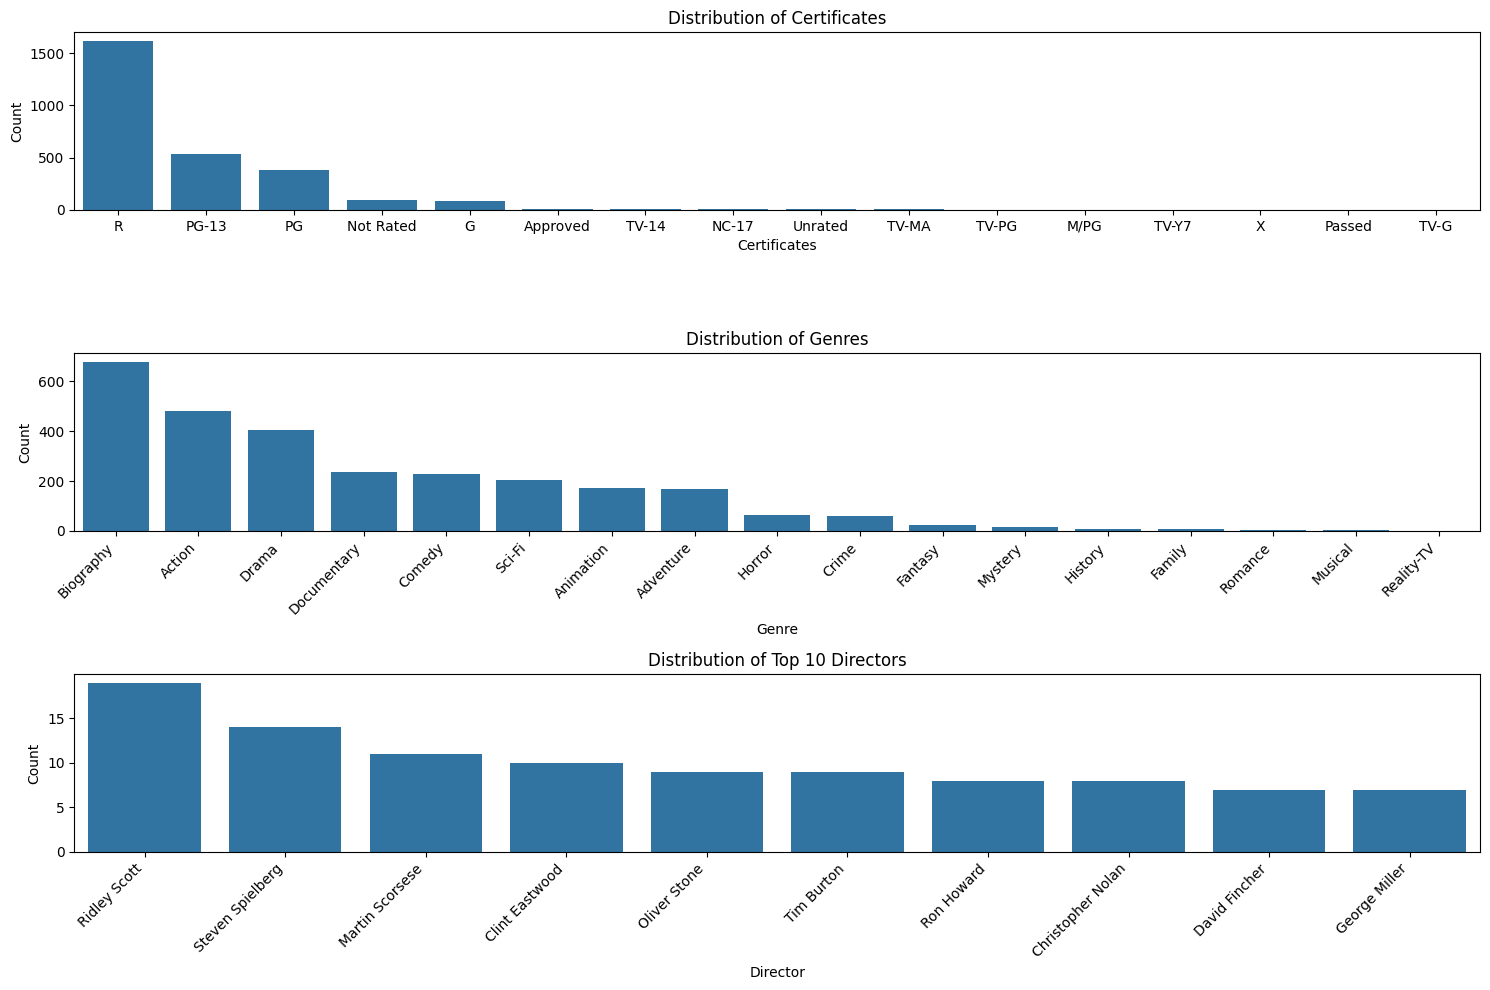

In [ ]:

# Distribution Analysis of Numerical Features
plt.figure(figsize=(15, 10))

# IMDb Rating Distribution
plt.subplot(3, 1, 1)
sns.histplot(df['IMDb Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

# MetaScore Distribution
plt.subplot(3, 1, 2)
sns.histplot(df['MetaScore'], bins=20, kde=True)
plt.title('Distribution of MetaScores')
plt.xlabel('MetaScore')
plt.ylabel('Frequency')

# Duration Distribution
plt.subplot(3, 1, 3)
sns.histplot(df['Duration (minutes)'], bins=20, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Distribution Analysis of Categorical Features
categorical_summary = df[['Certificates', 'Genre', 'Director']].describe()

plt.figure(figsize=(15, 10))

# Certificates Distribution
plt.subplot(3, 1, 1)
sns.countplot(data=df, x='Certificates', order=df['Certificates'].value_counts().index)
plt.title('Distribution of Certificates')
plt.xlabel('Certificates')
plt.ylabel('Count')

# Genre Distribution
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Director Distribution (Top 10 Directors)
top_10_directors = df['Director'].value_counts().index[:10]
plt.subplot(3, 1, 3)
sns.countplot(data=df[df['Director'].isin(top_10_directors)], x='Director', order=top_10_directors)
plt.title('Distribution of Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


IMDb Rating Distribution: The majority of movies have IMDb ratings between 6 and 8, with a peak around 7.

MetaScore Distribution: MetaScores are more widely spread out, with many movies scoring between 50 and 80.

Duration Distribution: Most movies have a duration between 100 and 130 minutes.


Certificates: "R" rated movies are the most common, followed by "PG-13" and "PG".

Genre: Action is the most frequent genre, followed by Adventure and Comedy.

Director (Top 10): The top directors with the most movies in the dataset are George Miller, Quentin Tarantino, and others.

In [ ]:
#Descriptive statics
descriptive_stats = df.describe()
print(descriptive_stats)
categorical_summary

       IMDb Rating         Year    MetaScore  Duration (minutes)
count  2762.000000  2762.000000  2762.000000         2762.000000
mean      6.898371  2004.443881    65.755612          115.241781
std       0.809457    16.955123    10.863215           21.184385
min       3.900000  1917.000000    20.000000           46.000000
25%       6.400000  1997.000000    65.000000          105.000000
50%       6.900000  2010.000000    66.000000          116.300000
75%       7.400000  2016.000000    67.000000          120.000000
max       9.500000  2025.000000   100.000000          317.000000


,Certificates,Genre,Director
count,2762,2762,2762
unique,16,17,2089
top,R,Biography,Ridley Scott
freq,1618,679,19


In [ ]:
df.columns


Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Poster-src', 'Duration (minutes)'],
      dtype='object')

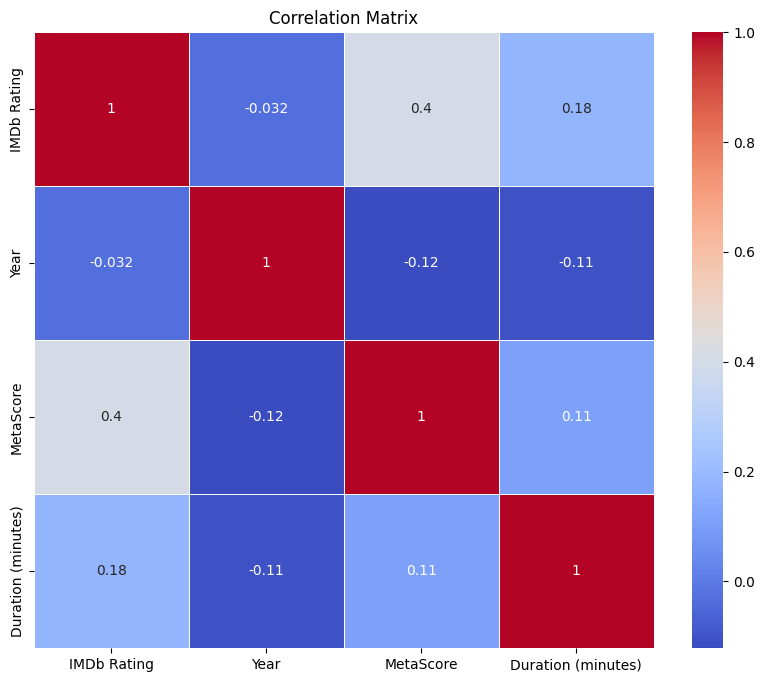

In [ ]:
#this is the correlation matrix
correlation_matrix = df.drop(['Director','Genre','Certificates','Title','Star Cast','Poster-src'],axis = 1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**There is a positive correlation (0.74), indicating that higher MetaScores generally align with higher IMDb ratings.**

# Advance Data Pre-Processing

In [ ]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [ ]:
df.drop(['Poster-src'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0


In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Director'] = df['Director'].astype(str)
df['Star Cast'] = df['Star Cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [ ]:
df['Genre'].sample(10)

,Genre
296,[Action]
1433,[Comedy]
1157,[Animation]
1921,[Drama]
2063,[Action]
497,[Biography]
2957,[Comedy]
3133,[Drama]
1454,[Horror]
1640,[Comedy]


In [ ]:
df.tail()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
3166,The Godfather Part II,9.0,1974,R,[Crime],Francis Ford Coppola,Francis Ford CoppolaMario Puzo,90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,[Crime],Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,[Action],Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,152.0
3171,The Godfather,9.2,1972,R,[Crime],Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,175.0
3172,The Shawshank Redemption,9.3,1994,R,[Drama],Frank Darabont,Tim RobbinsMorgan FreemanBob Gunton,82.0,142.0


In [ ]:
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_)
df = pd.concat([df, genre_encoded], axis=1)

In [ ]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),Action,...,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Reality-TV,Romance,Sci-Fi
0,End of the Spear,6.8,2005.0,PG-13,[Adventure],Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Elvira Madigan,7.0,1967.0,PG,[Biography],Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Kid Stays in the Picture,7.3,2002.0,R,[Documentary],Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,It Ain't Over,8.2,2022.0,PG,[Documentary],Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mahler,7.0,1974.0,PG,[Biography],Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mlb = MultiLabelBinarizer()
star_cast_encoded = mlb.fit_transform(df['Star Cast'])

In [ ]:
star_cast_df = pd.DataFrame(star_cast_encoded, columns=mlb.classes_)

In [ ]:
df = pd.concat([df, star_cast_df], axis=1)

In [ ]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),Action,...,Zachary LeviPhilip OrbanesKen Koury,Zack SnyderKurt JohnstadShay Hatten,Zack SnyderShay HattenJoby Harold,Zahara JohannesRoss JohnsonAleks Nial,Zak NeathamerRobert Colin BoydSteven Eric Allen,Zak PennErnest Cline,Zinovi Yuryev,Ziyi ZhangTôru NakamuraYe Liu,Zlatina FenerdzhiyevaAlexander FriedrichsonVladimir Shteryanov,Íñigo Vallejo-NágeraTimothy J. Sexton
0,End of the Spear,6.8,2005.0,PG-13,[Adventure],Jim Hanon,[Louie LeonardoChad AllenJack Guzman],45.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Elvira Madigan,7.0,1967.0,PG,[Biography],Bo Widerberg,[Pia DegermarkThommy BerggrenLennart Malmer],66.0,91.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Kid Stays in the Picture,7.3,2002.0,R,[Documentary],Nanette Burstein,[Robert EvansEddie AlbertPeter Bart],75.0,93.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,It Ain't Over,8.2,2022.0,PG,[Documentary],Sean Mullin,[Andy AndresRoger AngellMarty Appel],79.0,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mahler,7.0,1974.0,PG,[Biography],Ken Russell,[Robert PowellGeorgina HaleLee Montague],66.0,115.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in ['Director', 'Certificates']:
    df[col] = df[col].astype(str)  # Convert to string (if needed)
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.head(2)

,Title,IMDb Rating,Year,Certificates,Director,MetaScore,Duration (minutes),Action,Adventure,Animation,...,Zachary LeviPhilip OrbanesKen Koury,Zack SnyderKurt JohnstadShay Hatten,Zack SnyderShay HattenJoby Harold,Zahara JohannesRoss JohnsonAleks Nial,Zak NeathamerRobert Colin BoydSteven Eric Allen,Zak PennErnest Cline,Zinovi Yuryev,Ziyi ZhangTôru NakamuraYe Liu,Zlatina FenerdzhiyevaAlexander FriedrichsonVladimir Shteryanov,Íñigo Vallejo-NágeraTimothy J. Sexton
0,End of the Spear,6.8,2005.0,6,886,45.0,108.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Elvira Madigan,7.0,1967.0,5,211,66.0,91.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['combined_features'] = df['Genre'].apply(lambda x: ' '.join(x)) + ' ' + df['Director'] + ' ' + df['Star Cast'].apply(lambda x: ' '.join(x))

In [ ]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),combined_features
0,End of the Spear,6.8,2005,PG-13,[Adventure],Jim Hanon,[Louie LeonardoChad AllenJack Guzman],45.0,108.0,Adventure Jim Hanon Louie LeonardoChad AllenJa...
1,Elvira Madigan,7.0,1967,PG,[Biography],Bo Widerberg,[Pia DegermarkThommy BerggrenLennart Malmer],66.0,91.0,Biography Bo Widerberg Pia DegermarkThommy Ber...
2,The Kid Stays in the Picture,7.3,2002,R,[Documentary],Nanette Burstein,[Robert EvansEddie AlbertPeter Bart],75.0,93.0,Documentary Nanette Burstein Robert EvansEddie...
3,It Ain't Over,8.2,2022,PG,[Documentary],Sean Mullin,[Andy AndresRoger AngellMarty Appel],79.0,99.0,Documentary Sean Mullin Andy AndresRoger Angel...
4,Mahler,7.0,1974,PG,[Biography],Ken Russell,[Robert PowellGeorgina HaleLee Montague],66.0,115.0,Biography Ken Russell Robert PowellGeorgina Ha...


In [ ]:
df['combined_features'] = df['combined_features'].str.lower()

In [ ]:
df.head(2)

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),combined_features
0,End of the Spear,6.8,2005,PG-13,[Adventure],Jim Hanon,[Louie LeonardoChad AllenJack Guzman],45.0,108.0,adventure jim hanon louie leonardochad allenja...
1,Elvira Madigan,7.0,1967,PG,[Biography],Bo Widerberg,[Pia DegermarkThommy BerggrenLennart Malmer],66.0,91.0,biography bo widerberg pia degermarkthommy ber...


In [ ]:



tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['combined_features'])


print(tfidf_matrix.shape)


(2762, 10229)


In [ ]:



cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


print(cosine_sim.shape)


(2762, 2762)


In [ ]:

indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

def recommend_movies(title, cosine_sim=cosine_sim, df=df):
    """
    Recommend movies similar to the given title using cosine similarity.
    """
    if title not in indices:
        return "Movie not found in dataset."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:6]]
    return df['Title'].iloc[sim_indices].tolist()


print(recommend_movies("Inception"))


['Radio', 'Legion', 'Capitalism: A Love Story', "Maxwell's Demon", 'Walker']


In [ ]:

features = ['IMDb Rating', 'MetaScore']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Compute cosine similarity based on normalized features
cosine_sim = cosine_similarity(df_scaled[features])
movie_sim_df = pd.DataFrame(cosine_sim, index=df['Title'], columns=df['Title'])


def recommend_movies_cf(title, movie_sim_df=movie_sim_df):
    """
    Recommend movies based on collaborative filtering (implicit similarity).
    """
    if title not in movie_sim_df:
        return "Movie not found in dataset."
    similar_movies = movie_sim_df[title].sort_values(ascending=False)[1:6]
    return similar_movies.index.tolist()


print(recommend_movies_cf("Inception"))


['Hook', 'One Chance', 'The Nativity Story', 'Aladdin', 'Free State of Jones']


In [ ]:
# Normalize the similarity matrices so both contribute equally
content_sim = cosine_sim  # Content-based similarity (TF-IDF)
collab_sim = movie_sim_df.values  # Collaborative similarity (MinMax)

# Hybrid Similarity: Weighted Sum of both similarities
hybrid_sim = (0.5 * content_sim) + (0.5 * collab_sim)

# Convert to DataFrame
hybrid_sim_df = pd.DataFrame(hybrid_sim, index=df['Title'], columns=df['Title'])


In [ ]:
def recommend_movies_hybrid(title, hybrid_sim_df=hybrid_sim_df):
    """
    Recommend movies using Hybrid Recommendation (Content + Collaborative).
    """
    if title not in hybrid_sim_df:
        return "Movie not found in dataset."
    similar_movies = hybrid_sim_df[title].sort_values(ascending=False)[1:6]
    return similar_movies.index.tolist()


print(recommend_movies_hybrid("Inception"))


['Hook', 'One Chance', 'The Nativity Story', 'Aladdin', 'Free State of Jones']
